## Notebook for Long-Term S&P 500/10-Year Treasury/TSP C & G Fund Data
#### _This notebook details the calculations cited in: "The C Fund at 35: Trust the Long-Term Data When Investing in the TSP"_

### 1. Read in S&P 500 data file
#### (available as "earnings" under "additional info" at https://www.spglobal.com/spdji/en/indices/equity/sp-500/#overview)

In [1]:
import pandas as pd

spfile = "sp-500-eps-est.xlsx"

sp_df = pd.read_excel(spfile, sheet_name="QUARTERLY DATA")
sp_df.head(10)

,S&P Dow Jones Indices,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,S&P 500 QUARTERLY DATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,OPERATING,AS REPORTED,CASH,SALES,BOOK VAL,CAPITAL,NaN,NaN
3,QUARTER,EARNINGS,EARNINGS,DIVIDENDS,PER,PER,EXPENDITURE,NaN,NaN
4,END,PER SHR,PER SHR,PER SHR,SHARE,SHARE,PER SHARE,PRICE,DIVISOR
5,2022-09-30 00:00:00,NaN,NaN,16.6577,NaN,NaN,NaN,3585.624104,8399.952426
6,2022-06-30 00:00:00,46.87,42.74,16.627038,431.389139,1001.4726,23.341,3785.384846,8427.992061
7,2022-03-31 00:00:00,49.36,45.99,16.250101,413.731947,1005.6278,21.7779,4530.413452,8451.325198
8,2021-12-31 00:00:00,56.73,53.94,15.783466,423.17418,1008.0234,24.0466,4766.182972,8467.256805
9,2021-09-30 00:00:00,52.02,49.59,15.359,395.067149,983.0424,20.7683,4307.538751,8482.428192


In [2]:
# isolate the earnings and dividends from Q1 1988 to Q3 2022

sp_earnings = sp_df.iloc[6:144, 0:4]
sp_earnings.rename(columns={'S&P Dow Jones Indices':'Quarter', 'Unnamed: 1':'Earnings', 'Unnamed: 3':'Dividends'}, inplace=True)
sp_earnings = sp_earnings[['Quarter','Earnings','Dividends']].copy()
sp_earnings['Quarter'] = pd.to_datetime(sp_earnings['Quarter'])
sp_earnings = sp_earnings.set_index('Quarter')
sp_earnings.to_csv("SP500earning1988-2022.csv")
sp_earnings.head()

,Earnings,Dividends
Quarter,,
2022-06-30,46.87,16.627038
2022-03-31,49.36,16.250101
2021-12-31,56.73,15.783466
2021-09-30,52.02,15.359
2021-06-30,52.05,14.577407


### 2. Graph the data

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
matplotlib.rcdefaults()
import seaborn as sns

In [4]:
# create a function to graph data 

def graph_data(datum, graph_title, x_axis_label, file_name, datum_label=""):
    '''A function to graph data inputs'''
    
    sns.set(font_scale=1.2, rc={"lines.linewidth": 3, "figure.figsize":(11, 7)})
    fig, ax = plt.subplots()
    plt.title(graph_title)
    plt.grid(True)
    if not datum_label:
        sns.lineplot(data=datum)
    
    else:
        sns.lineplot(data=datum, label=datum_label)

    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 
    ax.set_xlabel(x_axis_label)

    plt.legend()
    
    plt.savefig(file_name)
    plt.show()

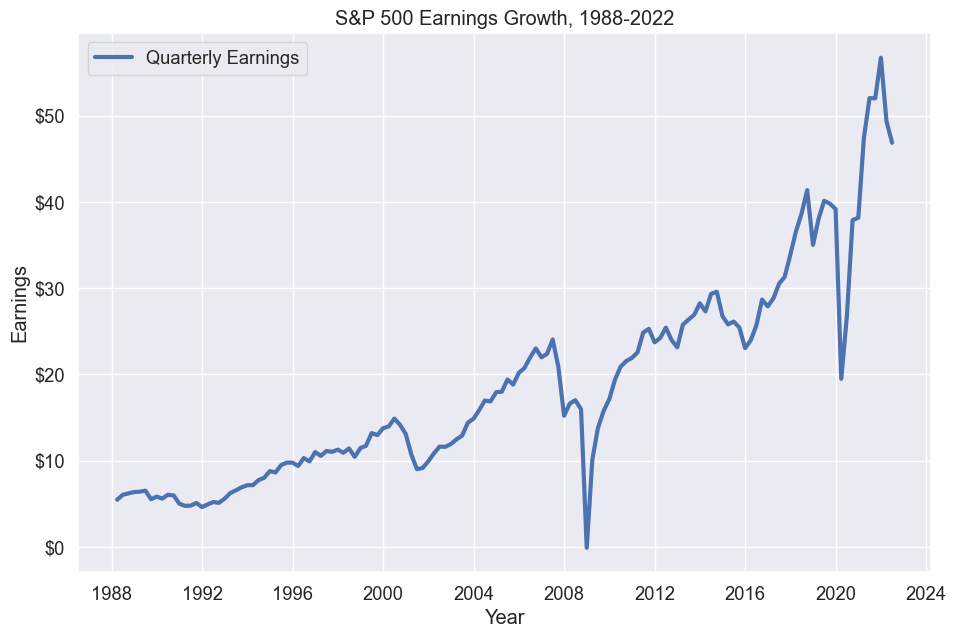

In [5]:
# graph the S&P 500 earnings and dividends data

graph_data(sp_earnings['Earnings'], "S&P 500 Earnings Growth, 1988-2022", "Year", "SP500_earningsgrowth", "Quarterly Earnings")

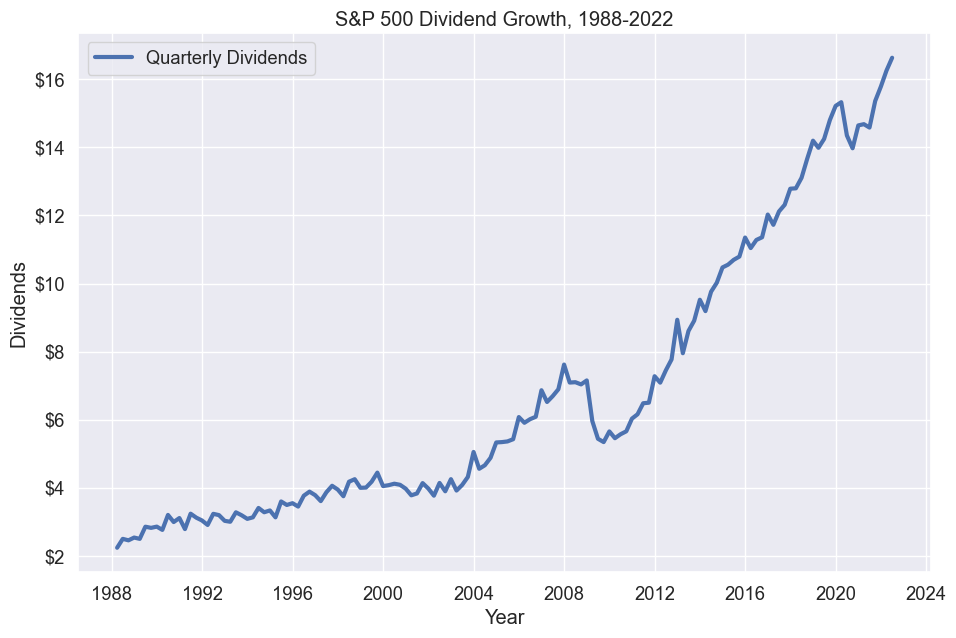

In [6]:
graph_data(sp_earnings['Dividends'], "S&P 500 Dividend Growth, 1988-2022", "Year", "SP500_dividendgrowth", "Quarterly Dividends")

### 3. Calculate and graph the TSP C Fund returns

In [7]:
# read in TSP fund monthly returns

tspfund_df = pd.read_csv("TSPfundmonthlyreturns.csv")
tspfund_df['month'] = pd.to_datetime(tspfund_df['month'])
tspfund_df = tspfund_df.set_index('month')
tspfund_df.head()

,L Income,L 2025,L 2030,L 2035,L 2040,L 2045,L 2050,L 2055,L 2060,L 2065,G Fund,F Fund,U.S. Aggregate Index,C Fund,S&P 500,S Fund,DJ TSM,I Fund,EAFE
month,,,,,,,,,,,,,,,,,,,
2022-11-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.3493,3.6965,0.00,5.5824,0.00,0.00,0.00,0.00,0.00
2022-10-01,1.98,3.07,4.52,4.91,5.32,5.66,6.02,7.36,7.36,7.36,0.3400,-1.2600,-1.30,8.1000,8.10,8.59,8.53,5.98,5.38
2022-09-01,-2.33,-3.98,-5.85,-6.44,-7.01,-7.50,-7.97,-9.29,-9.29,-9.29,0.2800,-4.3100,-4.32,-9.2100,-9.21,-9.91,-9.93,-9.40,-9.35
2022-08-01,-1.04,-1.83,-2.74,-3.03,-3.30,-3.55,-3.77,-4.36,-4.36,-4.36,0.2500,-2.8000,-2.83,-4.0800,-4.08,-2.08,-2.11,-5.79,-4.75
2022-07-01,2.21,3.50,5.00,5.47,5.92,6.33,6.72,7.89,7.90,7.90,0.2600,2.4700,2.44,9.2200,9.22,10.32,10.26,5.15,4.98


In [8]:
# isolate C Fund returns for calculations

slice_c = tspfund_df.iloc[:,13]

# drop 1987 data, since the C Fund did not accept contributions then (data is NaN)
slice_c = slice_c.dropna()

# reverse to chronological order for calculations 
slice_c = slice_c[::-1]

slice_c

month
1988-01-01   -0.2000
1988-02-01    4.8200
1988-03-01   -3.4700
1988-04-01    0.7300
1988-05-01    1.4200
               ...  
2022-07-01    9.2200
2022-08-01   -4.0800
2022-09-01   -9.2100
2022-10-01    8.1000
2022-11-01    5.5824
Name: C Fund, Length: 419, dtype: float64

In [9]:
# isolate F Fund returns for calculations

slice_f = tspfund_df.iloc[:,11]

# drop 1987 data, since the C Fund did not accept contributions then (data is NaN)
slice_f = slice_f.dropna()

# reverse to chronological order for calculations 
slice_f = slice_f[::-1]

slice_f

month
1988-01-01   -0.0600
1988-02-01    0.8100
1988-03-01   -0.8000
1988-04-01   -0.4600
1988-05-01   -0.6300
               ...  
2022-07-01    2.4700
2022-08-01   -2.8000
2022-09-01   -4.3100
2022-10-01   -1.2600
2022-11-01    3.6965
Name: F Fund, Length: 419, dtype: float64

In [10]:
# isolate G Fund returns for calculations from Jan 1988

slice_g = tspfund_df.iloc[:-9,10]

# drop 1987 data, since the C Fund did not accept contributions then (data is NaN)
slice_g = slice_g.dropna()

# reverse to chronological order for calculations 
slice_g = slice_g[::-1]

slice_g

month
1988-01-01    0.6900
1988-02-01    0.6200
1988-03-01    0.6600
1988-04-01    0.6800
1988-05-01    0.7100
               ...  
2022-07-01    0.2600
2022-08-01    0.2500
2022-09-01    0.2800
2022-10-01    0.3400
2022-11-01    0.3493
Name: G Fund, Length: 419, dtype: float64

In [11]:
def returns_of_initial_investment(df, initial_investment):
    '''A function to generate the return of an initial investment over a given DataFrame'''
    
    x = initial_investment
    returns = {}
    for index, value in df.items():
        x = x * (1 + (value * .01))
        returns.update({index: x})
    return returns

In [12]:
def returns_of_monthly_investment(df, initial_investment, monthly_investment):
    '''A function to generate the return of an initial and regular subsequent investments over a given DataFrame'''

    x = initial_investment
    returns = {}
    for index, value in df.items():
        z = monthly_investment
        x = z + (x * (1 + (value * .01)))
        returns.update({index: x})
    return returns


In [13]:
# Data of returns on $100 invested in the C Fund 

returns_c = pd.DataFrame(returns_of_initial_investment(slice_c, 100), index=[0]).T 
returns_c.rename(columns={0: 'C Fund'}, inplace=True)
returns_c.rename_axis(['Year'], inplace=True)

returns_c

,C Fund
Year,
1988-01-01,99.800000
1988-02-01,104.610360
1988-03-01,100.980381
1988-04-01,101.717537
1988-05-01,103.161926
...,...
2022-07-01,3368.592370
2022-08-01,3231.153802
2022-09-01,2933.564537


In [14]:
# Data of returns on $100 invested in the F Fund 

returns_f = pd.DataFrame(returns_of_initial_investment(slice_f, 100), index=[0]).T 
returns_f.rename(columns={0: 'F Fund'}, inplace=True)
returns_f.rename_axis(['Year'], inplace=True)

returns_f

,F Fund
Year,
1988-01-01,99.940000
1988-02-01,100.749514
1988-03-01,99.943518
1988-04-01,99.483778
1988-05-01,98.857030
...,...
2022-07-01,653.077772
2022-08-01,634.791594
2022-09-01,607.432076


In [15]:
# Data of returns on $100 invested in the G Fund 

returns_g  = pd.DataFrame(returns_of_initial_investment(slice_g, 100), index=[0]).T 
returns_g.rename(columns={0: 'G Fund'}, inplace=True)
returns_g.rename_axis(['Year'], inplace=True)

returns_g

,G Fund
Year,
1988-01-01,100.690000
1988-02-01,101.314278
1988-03-01,101.982952
1988-04-01,102.676436
1988-05-01,103.405439
...,...
2022-07-01,473.187468
2022-08-01,474.370437
2022-09-01,475.698674


In [16]:
# Data of returns on $100 invested monthly in the C Fund 

returns_monthly_c  = pd.DataFrame(returns_of_monthly_investment(slice_c, 100, 100), index=[0]).T 
returns_monthly_c.rename(columns={0: 'C Fund'}, inplace=True)
returns_monthly_c.rename_axis(['Year'], inplace=True)

returns_monthly_c

,C Fund
Year,
1988-01-01,199.800000
1988-02-01,309.430360
1988-03-01,398.693127
1988-04-01,501.603586
1988-05-01,608.726357
...,...
2022-07-01,330631.884075
2022-08-01,317242.103204
2022-09-01,288124.105499


In [17]:
# Data of returns on $100 invested monthly in the F Fund 

returns_monthly_f  = pd.DataFrame(returns_of_monthly_investment(slice_f, 100, 100), index=[0]).T 
returns_monthly_f.rename(columns={0: 'F Fund'}, inplace=True)
returns_monthly_f.rename_axis(['Year'], inplace=True)

returns_monthly_f

,F Fund
Year,
1988-01-01,199.940000
1988-02-01,301.559514
1988-03-01,399.147038
1988-04-01,497.310962
1988-05-01,594.177902
...,...
2022-07-01,100421.236388
2022-08-01,97709.441769
2022-09-01,93598.164829


In [18]:
# Data of returns on $100 invested monthly in the G Fund 

returns_monthly_g = pd.DataFrame(returns_of_monthly_investment(slice_g, 100, 100), index=[0]).T 
returns_monthly_g.rename(columns={0: 'G Fund'}, inplace=True)
returns_monthly_g.rename_axis(['Year'], inplace=True)

returns_monthly_g

,G Fund
Year,
1988-01-01,200.690000
1988-02-01,301.934278
1988-03-01,403.927044
1988-04-01,506.673748
1988-05-01,610.271132
...,...
2022-07-01,81253.821908
2022-08-01,81556.956463
2022-09-01,81885.315941


In [19]:
# Combine datasets and graph the data

from functools import reduce

returns_100 = [returns_c, returns_f, returns_g]
monthly_returns_100 = [returns_monthly_c, returns_monthly_f, returns_monthly_g]

final_returns_100 = reduce(lambda  left,right: pd.merge(left,right,on=['Year'], how='outer'), returns_100)
final_monthly_returns_100 = reduce(lambda  left,right: pd.merge(left,right,on=['Year'], how='outer'), monthly_returns_100)

final_returns_100.dropna(inplace=True)
final_monthly_returns_100.dropna(inplace=True)

final_monthly_returns_100

,C Fund,F Fund,G Fund
Year,,,
1988-01-01,199.800000,199.940000,200.690000
1988-02-01,309.430360,301.559514,301.934278
1988-03-01,398.693127,399.147038,403.927044
1988-04-01,501.603586,497.310962,506.673748
1988-05-01,608.726357,594.177902,610.271132
...,...,...,...
2022-07-01,330631.884075,100421.236388,81253.821908
2022-08-01,317242.103204,97709.441769,81556.956463
2022-09-01,288124.105499,93598.164829,81885.315941


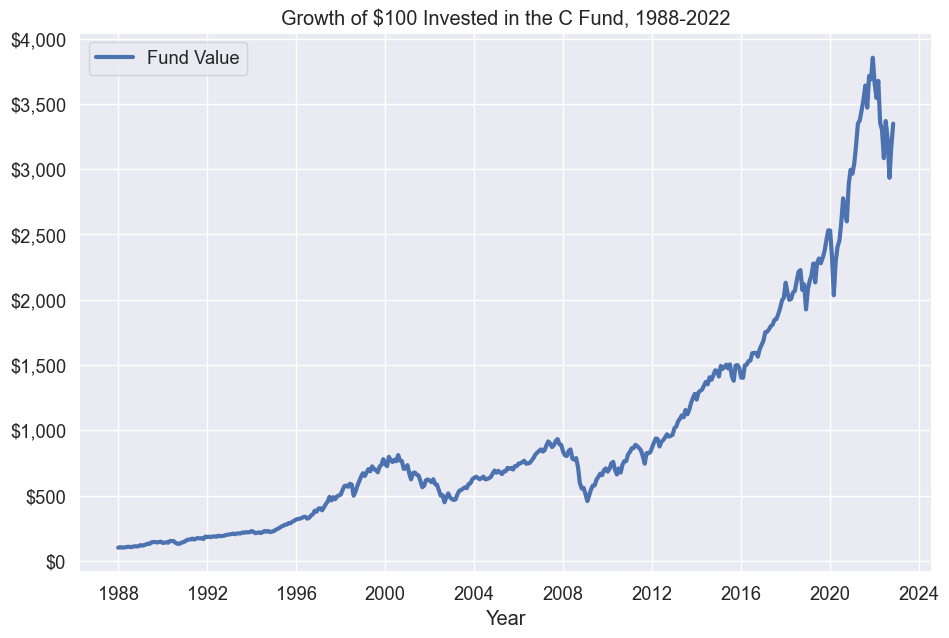

In [20]:
graph_data(returns_of_initial_investment(slice_c, 100), "Growth of $100 Invested in the C Fund, 1988-2022", "Year", "ReturnsOn100", "Fund Value")

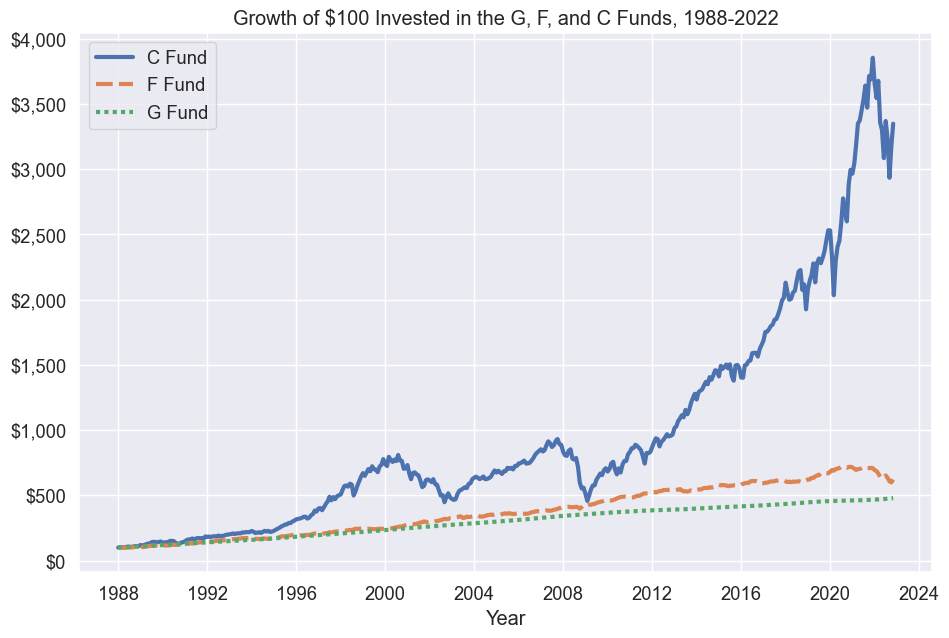

In [21]:
graph_data(final_returns_100, "Growth of $100 Invested in the G, F, and C Funds, 1988-2022", "Year", "ReturnsOn100")

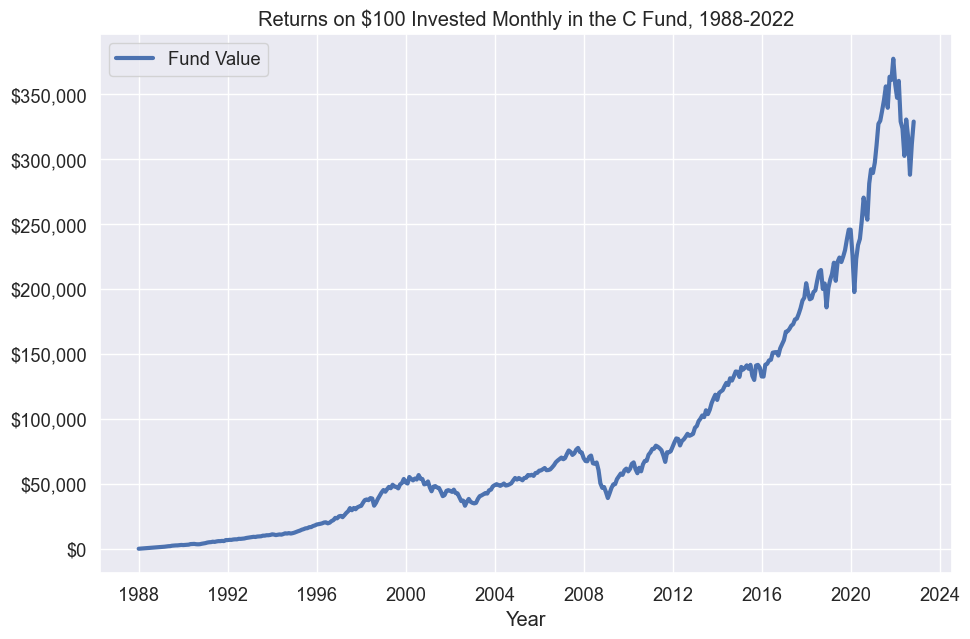

In [22]:
graph_data(returns_of_monthly_investment(slice_c, 100, 100), "Returns on $100 Invested Monthly in the C Fund, 1988-2022", "Year", "ReturnsOn100Monthly", "Fund Value")

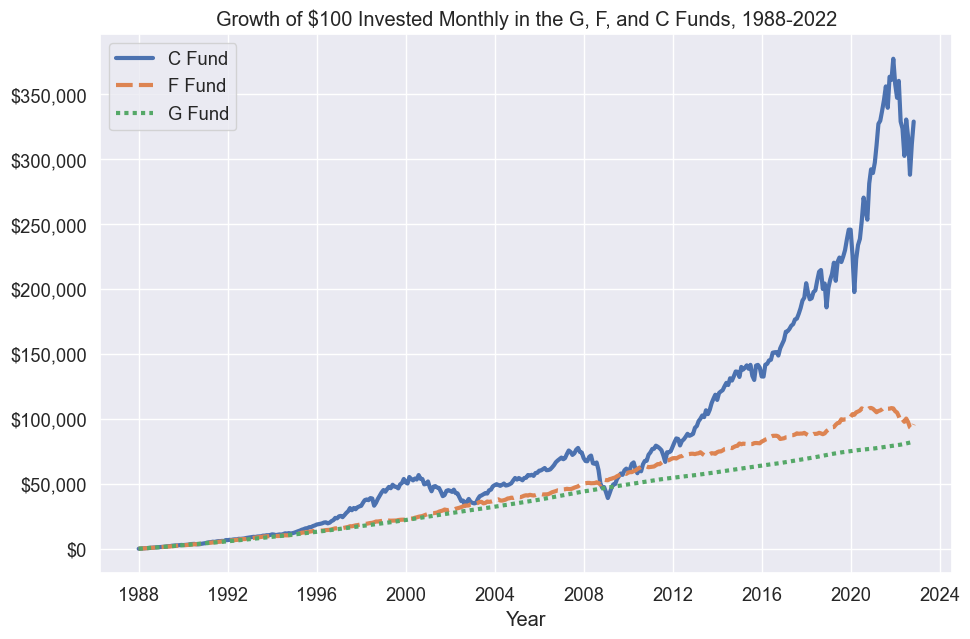

In [23]:
graph_data(final_monthly_returns_100, "Growth of $100 Invested Monthly in the G, F, and C Funds, 1988-2022", "Year", "ReturnsOn100Monthly")

### 4. Calculate and graph hypothetical 35-year returns during the 1970s

In [24]:
# Read in, prep market data

# S&P 500 data

sp500_file = "sp_comp_1900_2019.csv"
sp500 = pd.read_csv(sp500_file)
sp500['date'] = pd.to_datetime(sp500['date'])

sp = sp500['sp_composite_price']
sp = sp.pct_change()
sp500['change'] = sp + 1
sp500['adj_divs'] = sp500['dividend'] / 12
sp500 = sp500.fillna(1)

# 10-Year data

tenyear_file = "10_yr_historical.csv"
tenyear = pd.read_csv(tenyear_file)
tenyear = tenyear.sort_values(by='date')
tenyear['date'] = pd.to_datetime(tenyear['date'])

ty = tenyear['yield']
ty = ((ty / 12) * .01) + 1
tenyear['monthly_interest'] = ty
tenyear = tenyear.fillna(1)

# Note: see "Overflow" section below for details on the close correlation of the U.S. 10-year Treasury Bond yields 
# with G Fund monthly returns

sp500_indexed = sp500.set_index('date')
tenyear_indexed = tenyear.set_index('date')

sp500_indexed.tail()

,sp_composite_price,dividend,change,adj_divs
date,,,,
2022-05-01,4040.36,63.34,0.920083,5.278333
2022-06-01,3898.95,64.02,0.965001,5.335000
2022-07-01,3911.73,64.45,1.003278,5.370833
2022-08-01,4158.56,64.89,1.063100,5.407500
2022-09-01,3850.52,65.32,0.925926,5.443333


In [25]:
# build a function to return monthly contributions that increase yearly

def monthly_contributions(contribution, yearly_increase, years):
    '''A function to generate contribution amounts by month over a given number of years, 
    with annual percentage increases in monthly contributions'''
    
    t = contribution
    month_contributions = []
    for n in range(years):
        if n < 1:
            month_contributions.append(t)
        else: 
            t = t * (1 + yearly_increase)
            t = round(t, 2)
            month_contributions.append(t)
            
    cse = [([n] * 12) for n in month_contributions]
    final_contributions = [item for sublist in cse for item in sublist]
    return final_contributions

In [26]:
# Set monthly contributions starting at $250 the first year and growing by 5% each year for 35 years

total_contributions_35 = monthly_contributions(250, .05, 35)
print("The total number of contributions is:", len(total_contributions_35))
print("The final contribution is: $", total_contributions_35[-1])
print("The sum total of contributions made over 35 years is: $", pd.Series(total_contributions_35).sum())

The total number of contributions is: 420
The final contribution is: $ 1313.33
The sum total of contributions made over 35 years is: $ 270957.72


In [27]:
total_contributions_35

[250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 262.5,
 262.5,
 262.5,
 262.5,
 262.5,
 262.5,
 262.5,
 262.5,
 262.5,
 262.5,
 262.5,
 262.5,
 275.62,
 275.62,
 275.62,
 275.62,
 275.62,
 275.62,
 275.62,
 275.62,
 275.62,
 275.62,
 275.62,
 275.62,
 289.4,
 289.4,
 289.4,
 289.4,
 289.4,
 289.4,
 289.4,
 289.4,
 289.4,
 289.4,
 289.4,
 289.4,
 303.87,
 303.87,
 303.87,
 303.87,
 303.87,
 303.87,
 303.87,
 303.87,
 303.87,
 303.87,
 303.87,
 303.87,
 319.06,
 319.06,
 319.06,
 319.06,
 319.06,
 319.06,
 319.06,
 319.06,
 319.06,
 319.06,
 319.06,
 319.06,
 335.01,
 335.01,
 335.01,
 335.01,
 335.01,
 335.01,
 335.01,
 335.01,
 335.01,
 335.01,
 335.01,
 335.01,
 351.76,
 351.76,
 351.76,
 351.76,
 351.76,
 351.76,
 351.76,
 351.76,
 351.76,
 351.76,
 351.76,
 351.76,
 369.35,
 369.35,
 369.35,
 369.35,
 369.35,
 369.35,
 369.35,
 369.35,
 369.35,
 369.35,
 369.35,
 369.35,
 387.82,
 387.82,
 387.82,
 387.82,
 387.82,
 387.82,
 387.82,
 387.82,
 387.82,
 387.82

In [28]:
# Function for calculating hypothetical C Fund returns based on year of initial investment and contributions

def total_cfund_return_calc(year, total_years, contributions, df):
    '''A function for calculating hypothetical returns in a stock fund with dividends reinvested,
    based on regular contributions, the year of initial investment and total years of investment'''
    
    total_return = []
    future_year = year + (total_years - 1)
    x = 0
    rolling_total = 0
    df = df.loc[lambda x : x.index.year >= year]
    df = df.loc[lambda x: x.index.year <= future_year]
    months = []

    for contribution in contributions:
        month = df.index[x]
        months.append(month)
    
        dividends = (rolling_total / df.iloc[x, 0]) * df.iloc[x, 3]
        rolling_total = ((contribution + rolling_total) * df.iloc[x, 2]) + dividends

        total_return.append(round(rolling_total, 2))

        
        x += 1

    z = list(zip(months, total_return))
    return z 

In [29]:
# Function for calculating hypothetical G Fund returns based on year of initial investment and contributions

def total_gfund_return_calc(year, total_years, contributions, df):
    '''A function for calculating hypothetical returns in a bond fund or interest-bearing savings account,
    based on regular contributions, the year of initial investment and total years of investment'''
    
    
    total_return = []
    future_year = year + (total_years - 1)
    x = 0
    rolling_total = 0
    df = df.loc[lambda x : x.index.year >= year]
    df = df.loc[lambda x: x.index.year <= future_year]
    months = []


    for contribution in contributions:
        month = df.index[x]
        months.append(month)
    
        rolling_total = (contribution + rolling_total) * df.iloc[x, 1]
        total_return.append(round(rolling_total, 2))
        
        x += 1

    z = list(zip(months, total_return))
    return z 

In [30]:
# Show initial calculations 

total_cfund_return_calc(1949, 35, total_contributions_35, sp500_indexed)

[(Timestamp('1949-01-01 00:00:00'), 252.8),
 (Timestamp('1949-02-01 00:00:00'), 484.85),
 (Timestamp('1949-03-01 00:00:00'), 744.48),
 (Timestamp('1949-04-01 00:00:00'), 997.27),
 (Timestamp('1949-05-01 00:00:00'), 1243.73),
 (Timestamp('1949-06-01 00:00:00'), 1419.44),
 (Timestamp('1949-07-01 00:00:00'), 1772.1),
 (Timestamp('1949-08-01 00:00:00'), 2104.65),
 (Timestamp('1949-09-01 00:00:00'), 2397.23),
 (Timestamp('1949-10-01 00:00:00'), 2729.04),
 (Timestamp('1949-11-01 00:00:00'), 3035.96),
 (Timestamp('1949-12-01 00:00:00'), 3391.1),
 (Timestamp('1950-01-01 00:00:00'), 3747.96),
 (Timestamp('1950-02-01 00:00:00'), 4109.91),
 (Timestamp('1950-03-01 00:00:00'), 4431.08),
 (Timestamp('1950-04-01 00:00:00'), 4850.56),
 (Timestamp('1950-05-01 00:00:00'), 5311.11),
 (Timestamp('1950-06-01 00:00:00'), 5692.62),
 (Timestamp('1950-07-01 00:00:00'), 5556.79),
 (Timestamp('1950-08-01 00:00:00'), 6203.28),
 (Timestamp('1950-09-01 00:00:00'), 6729.85),
 (Timestamp('1950-10-01 00:00:00'), 7320.

In [31]:
total_cfund_return_calc(1959, 35, total_contributions_35, sp500_indexed)

[(Timestamp('1959-01-01 00:00:00'), 259.96),
 (Timestamp('1959-02-01 00:00:00'), 502.86),
 (Timestamp('1959-03-01 00:00:00'), 773.29),
 (Timestamp('1959-04-01 00:00:00'), 1042.42),
 (Timestamp('1959-05-01 00:00:00'), 1314.56),
 (Timestamp('1959-06-01 00:00:00'), 1554.47),
 (Timestamp('1959-07-01 00:00:00'), 1879.98),
 (Timestamp('1959-08-01 00:00:00'), 2122.6),
 (Timestamp('1959-09-01 00:00:00'), 2284.35),
 (Timestamp('1959-10-01 00:00:00'), 2538.2),
 (Timestamp('1959-11-01 00:00:00'), 2806.18),
 (Timestamp('1959-12-01 00:00:00'), 3161.15),
 (Timestamp('1960-01-01 00:00:00'), 3372.43),
 (Timestamp('1960-02-01 00:00:00'), 3503.57),
 (Timestamp('1960-03-01 00:00:00'), 3725.05),
 (Timestamp('1960-04-01 00:00:00'), 4049.81),
 (Timestamp('1960-05-01 00:00:00'), 4284.77),
 (Timestamp('1960-06-01 00:00:00'), 4727.42),
 (Timestamp('1960-07-01 00:00:00'), 4879.93),
 (Timestamp('1960-08-01 00:00:00'), 5218.16),
 (Timestamp('1960-09-01 00:00:00'), 5331.26),
 (Timestamp('1960-10-01 00:00:00'), 549

In [32]:
total_gfund_return_calc(1949, 35, total_contributions_35, tenyear_indexed)

[(Timestamp('1949-01-01 00:00:00'), 250.48),
 (Timestamp('1949-02-01 00:00:00'), 501.44),
 (Timestamp('1949-03-01 00:00:00'), 752.89),
 (Timestamp('1949-04-01 00:00:00'), 1004.82),
 (Timestamp('1949-05-01 00:00:00'), 1257.24),
 (Timestamp('1949-06-01 00:00:00'), 1510.14),
 (Timestamp('1949-07-01 00:00:00'), 1763.54),
 (Timestamp('1949-08-01 00:00:00'), 2017.43),
 (Timestamp('1949-09-01 00:00:00'), 2271.82),
 (Timestamp('1949-10-01 00:00:00'), 2526.69),
 (Timestamp('1949-11-01 00:00:00'), 2782.06),
 (Timestamp('1949-12-01 00:00:00'), 3037.92),
 (Timestamp('1950-01-01 00:00:00'), 3306.8),
 (Timestamp('1950-02-01 00:00:00'), 3576.26),
 (Timestamp('1950-03-01 00:00:00'), 3846.31),
 (Timestamp('1950-04-01 00:00:00'), 4116.96),
 (Timestamp('1950-05-01 00:00:00'), 4388.22),
 (Timestamp('1950-06-01 00:00:00'), 4660.1),
 (Timestamp('1950-07-01 00:00:00'), 4932.61),
 (Timestamp('1950-08-01 00:00:00'), 5205.8),
 (Timestamp('1950-09-01 00:00:00'), 5479.65),
 (Timestamp('1950-10-01 00:00:00'), 5754

In [33]:
total_gfund_return_calc(1959, 35, total_contributions_35, tenyear_indexed)

[(Timestamp('1959-01-01 00:00:00'), 250.84),
 (Timestamp('1959-02-01 00:00:00'), 502.49),
 (Timestamp('1959-03-01 00:00:00'), 754.99),
 (Timestamp('1959-04-01 00:00:00'), 1008.44),
 (Timestamp('1959-05-01 00:00:00'), 1262.96),
 (Timestamp('1959-06-01 00:00:00'), 1518.43),
 (Timestamp('1959-07-01 00:00:00'), 1774.92),
 (Timestamp('1959-08-01 00:00:00'), 2032.39),
 (Timestamp('1959-09-01 00:00:00'), 2291.3),
 (Timestamp('1959-10-01 00:00:00'), 2550.89),
 (Timestamp('1959-11-01 00:00:00'), 2811.46),
 (Timestamp('1959-12-01 00:00:00'), 3073.43),
 (Timestamp('1960-01-01 00:00:00'), 3349.05),
 (Timestamp('1960-02-01 00:00:00'), 3625.06),
 (Timestamp('1960-03-01 00:00:00'), 3901.33),
 (Timestamp('1960-04-01 00:00:00'), 4178.68),
 (Timestamp('1960-05-01 00:00:00'), 4457.28),
 (Timestamp('1960-06-01 00:00:00'), 4736.1),
 (Timestamp('1960-07-01 00:00:00'), 5014.85),
 (Timestamp('1960-08-01 00:00:00'), 5294.06),
 (Timestamp('1960-09-01 00:00:00'), 5574.16),
 (Timestamp('1960-10-01 00:00:00'), 585

In [34]:
def c_gfundreturns_rebalanced(year, total_years, contributions, df1, df2, amounttodf1, amounttodf2): 
    '''A function for calculating hypothetical returns in a stock and a bond fund with dividends reinvested,
    based on regular percentage contributions to each fund, the year of initial investment and total years 
    of investment; the fund is rebalanced according to the contribution percentages annually'''
    
    
    total_return = []
    future_year = year + (total_years - 1)
    x = 0
    rolling_total = 0
    rolling_total_sp = 0
    rolling_total_gov = 0
    df_sp = df1.loc[lambda x : x.index.year >= year]
    df_sp = df_sp.loc[lambda x: x.index.year <= future_year]
    df_gov = df2.loc[lambda x : x.index.year >= year]
    df_gov = df_gov.loc[lambda x: x.index.year <= future_year]
    months = []
    
    total_dividends = []
    for contribution in contributions:
        month = df_sp.index[x]
        months.append(month)
        sp_contribution = contribution * amounttodf1
        gov_contribution = contribution * amounttodf2
        dividends = (rolling_total_sp / df_sp.iloc[x, 0]) * df_sp.iloc[x, 3] 
        rolling_total_sp = ((sp_contribution + rolling_total_sp) * df_sp.iloc[x, 2]) + dividends

        rolling_total_gov = (gov_contribution + rolling_total_gov) * df_gov.iloc[x, 1]

        
        rolling_total = rolling_total_sp + rolling_total_gov
        
        if x % 12 == 0:
            rolling_total_sp = rolling_total * amounttodf1
            rolling_total_gov = rolling_total * amounttodf2
            rolling_total = rolling_total_sp + rolling_total_gov
        else:
            pass
        
        total_return.append(round(rolling_total, 2))
        total_dividends.append(round(dividends, 2))
        
        x += 1
    z = list(zip(months, total_return))
    return z

In [35]:
c_gfundreturns_rebalanced(1959, 35, total_contributions_35, sp500_indexed, tenyear_indexed, .6, .4)

[(Timestamp('1959-01-01 00:00:00'), 256.31),
 (Timestamp('1959-02-01 00:00:00'), 502.75),
 (Timestamp('1959-03-01 00:00:00'), 765.95),
 (Timestamp('1959-04-01 00:00:00'), 1028.78),
 (Timestamp('1959-05-01 00:00:00'), 1293.83),
 (Timestamp('1959-06-01 00:00:00'), 1539.99),
 (Timestamp('1959-07-01 00:00:00'), 1837.8),
 (Timestamp('1959-08-01 00:00:00'), 2086.38),
 (Timestamp('1959-09-01 00:00:00'), 2287.09),
 (Timestamp('1959-10-01 00:00:00'), 2543.24),
 (Timestamp('1959-11-01 00:00:00'), 2808.25),
 (Timestamp('1959-12-01 00:00:00'), 3125.95),
 (Timestamp('1960-01-01 00:00:00'), 3363.01),
 (Timestamp('1960-02-01 00:00:00'), 3552.32),
 (Timestamp('1960-03-01 00:00:00'), 3795.8),
 (Timestamp('1960-04-01 00:00:00'), 4101.53),
 (Timestamp('1960-05-01 00:00:00'), 4354.0),
 (Timestamp('1960-06-01 00:00:00'), 4730.92),
 (Timestamp('1960-07-01 00:00:00'), 4934.06),
 (Timestamp('1960-08-01 00:00:00'), 5248.63),
 (Timestamp('1960-09-01 00:00:00'), 5428.69),
 (Timestamp('1960-10-01 00:00:00'), 5642

In [36]:
# run calculations 

c_1949_df = pd.DataFrame(total_cfund_return_calc(1949, 35, total_contributions_35, sp500_indexed), columns = ['Year', 'C Fund']).set_index(['Year'])
g_1949_df = pd.DataFrame(total_gfund_return_calc(1949, 35, total_contributions_35, tenyear_indexed), columns = ['Year', 'G Fund']).set_index(['Year'])
cg_1949_rebalanced_df = pd.DataFrame(c_gfundreturns_rebalanced(1949, 35, total_contributions_35, sp500_indexed, tenyear_indexed, .6, .4), columns = ['Year', '60-40 Rebalanced']).set_index(['Year'])

c_1959_df = pd.DataFrame(total_cfund_return_calc(1959, 35, total_contributions_35, sp500_indexed), columns = ['Year', 'C Fund']).set_index(['Year'])
g_1959_df = pd.DataFrame(total_gfund_return_calc(1959, 35, total_contributions_35, tenyear_indexed), columns = ['Year', 'G Fund']).set_index(['Year'])
cg_1959_rebalanced_df = pd.DataFrame(c_gfundreturns_rebalanced(1959, 35, total_contributions_35, sp500_indexed, tenyear_indexed, .6, .4), columns = ['Year', '60-40 Rebalanced']).set_index(['Year'])


In [37]:
cg_1959_rebalanced_df

,60-40 Rebalanced
Year,
1959-01-01,256.31
1959-02-01,502.75
1959-03-01,765.95
1959-04-01,1028.78
1959-05-01,1293.83
...,...
1993-08-01,1559172.17
1993-09-01,1576015.29
1993-10-01,1591963.12


In [38]:
# Combine the DataFrames to graph

from functools import reduce

dfs_1949 = [c_1949_df, g_1949_df, cg_1949_rebalanced_df]
dfs_1959 = [c_1959_df, g_1959_df, cg_1959_rebalanced_df]

final_df_1949 = reduce(lambda  left,right: pd.merge(left,right,on=['Year'], how='outer'), dfs_1949)
final_df_1959 = reduce(lambda  left,right: pd.merge(left,right,on=['Year'], how='outer'), dfs_1959)

final_df_1949

,C Fund,G Fund,60-40 Rebalanced
Year,,,
1949-01-01,252.80,250.48,251.87
1949-02-01,484.85,501.44,491.51
1949-03-01,744.48,752.89,747.85
1949-04-01,997.27,1004.82,1000.30
1949-05-01,1243.73,1257.24,1249.15
...,...,...,...
1983-08-01,1383615.86,854755.37,1157753.75
1983-09-01,1430690.26,864379.70,1187057.21
1983-10-01,1441283.79,874018.11,1197471.93


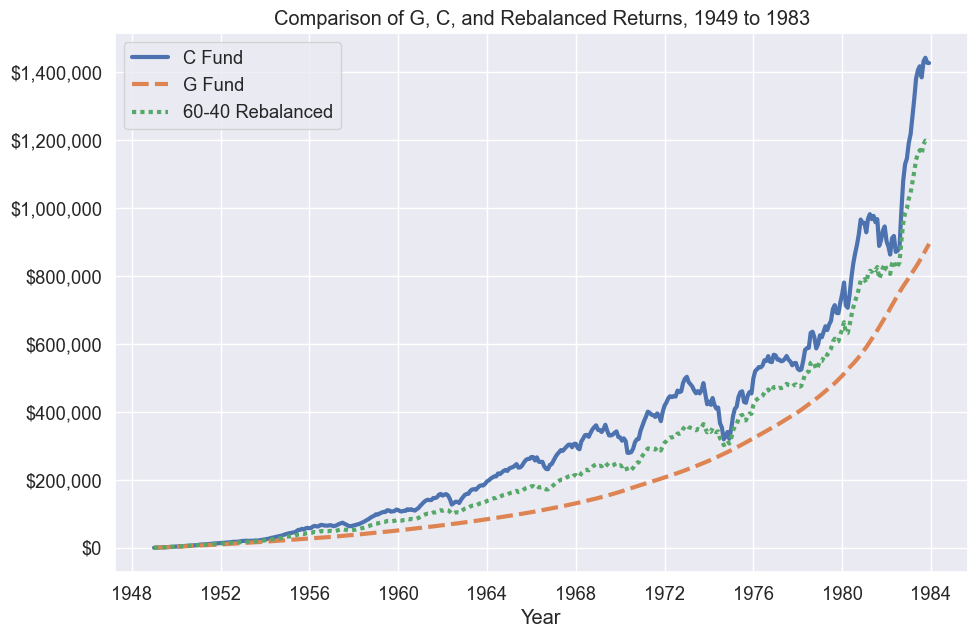

In [39]:
# Graph the results

graph_data(final_df_1949, "Comparison of G, C, and Rebalanced Returns, 1949 to 1983", "Year", "TotalReturns1949_1983")

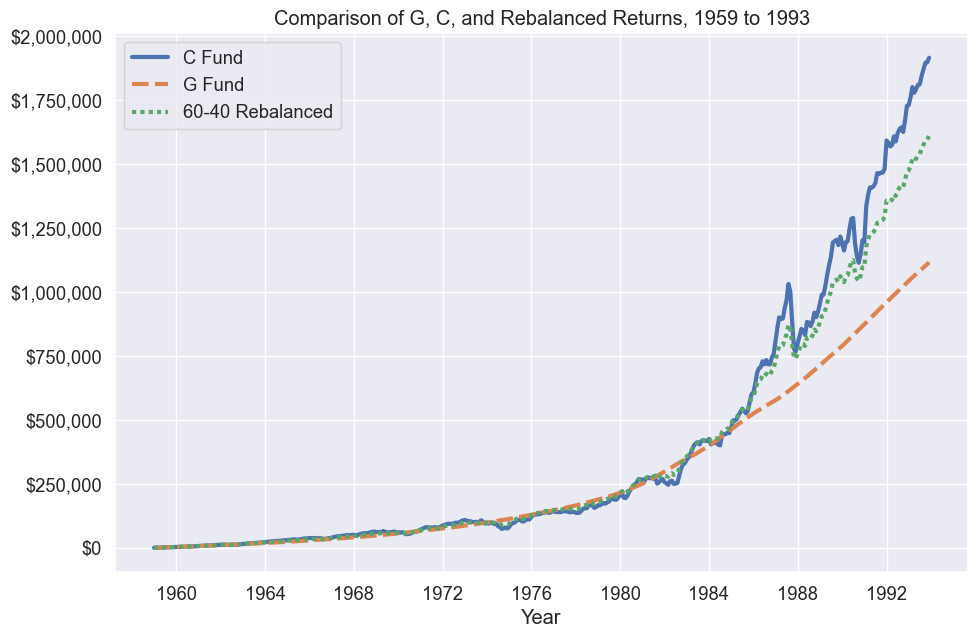

In [40]:
graph_data(final_df_1959, "Comparison of G, C, and Rebalanced Returns, 1959 to 1993", "Year", "TotalReturns1959_1993")

# Methodology Checks

### Correlation of the G Fund and the 10-Year U.S. Gov Bond

In [41]:
# Compare the G Fund monthly returns with the 10-Year monthly returns, Jan 1988 to Dec 2019

gfund = tspfund_df.iloc[34:418, 10]
gfund = gfund[::-1]
gfund

month
1988-02-01    0.62
1988-03-01    0.66
1988-04-01    0.68
1988-05-01    0.71
1988-06-01    0.72
              ... 
2019-09-01    0.14
2019-10-01    0.14
2019-11-01    0.14
2019-12-01    0.16
2020-01-01    0.17
Name: G Fund, Length: 384, dtype: float64

In [42]:
tenyear_indexed["10 Year"] = (tenyear_indexed['monthly_interest'] - 1) * 100
tenyear_indexed

,yield,monthly_interest,10 Year
date,,,
1900-01-01,3.15,1.002625,0.262500
1900-02-01,3.15,1.002625,0.262500
1900-03-01,3.14,1.002617,0.261667
1900-04-01,3.14,1.002617,0.261667
1900-05-01,3.13,1.002608,0.260833
...,...,...,...
2019-08-01,1.63,1.001358,0.135833
2019-09-01,1.70,1.001417,0.141667
2019-10-01,1.71,1.001425,0.142500


In [43]:
tenyear = tenyear_indexed.iloc[1056:, 2]
tenyear

date
1988-01-01    0.722500
1988-02-01    0.684167
1988-03-01    0.697500
1988-04-01    0.726667
1988-05-01    0.757500
                ...   
2019-08-01    0.135833
2019-09-01    0.141667
2019-10-01    0.142500
2019-11-01    0.150833
2019-12-01    0.155000
Name: 10 Year, Length: 384, dtype: float64

In [44]:
gfund_tenyear = pd.merge(tenyear, gfund, right_index=True, left_index=True)
gfund_tenyear

,10 Year,G Fund
1988-02-01,0.684167,0.62
1988-03-01,0.697500,0.66
1988-04-01,0.726667,0.68
1988-05-01,0.757500,0.71
1988-06-01,0.743333,0.72
...,...,...
2019-08-01,0.135833,0.18
2019-09-01,0.141667,0.14
2019-10-01,0.142500,0.14
2019-11-01,0.150833,0.14


In [45]:
# the two data sets are almost perfectly correlated 

gfund_tenyear.corr()

,10 Year,G Fund
10 Year,1.000000,0.986852
G Fund,0.986852,1.000000


<AxesSubplot:>

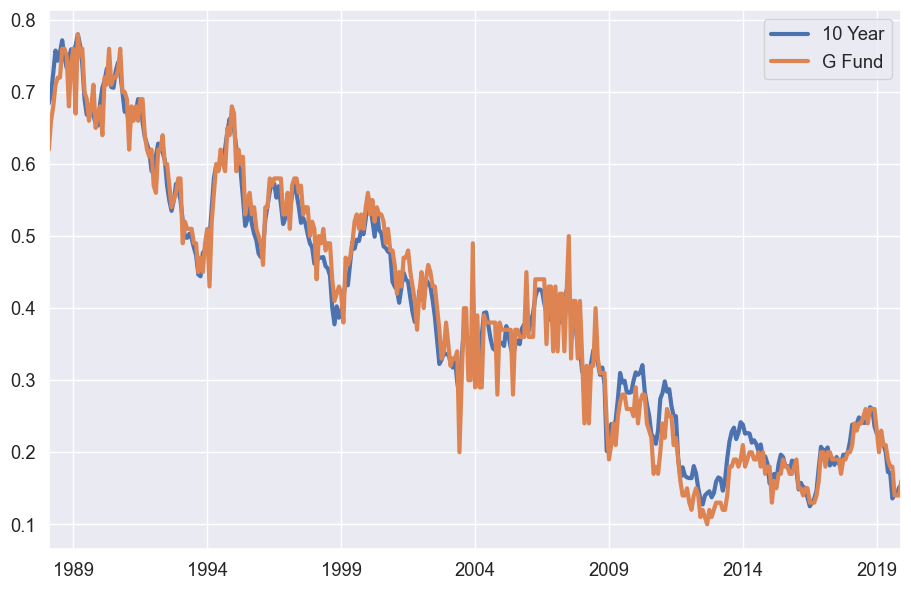

In [46]:
gfund_tenyear.plot()

### Comparison of investment calculation methods for 1988-2017 (30 years):
### Hypothetical returns via market data method vs. Calculating via monthly TSP fund investment method

In [47]:
# Get contributions for 30 years

total_contributions_30 = monthly_contributions(250, .05, 30)

In [48]:
# Calculate hypothetical returns using S&P 500 data, with dividends reinvested, from 1988 to 2017

total_cfund_return_calc(1988, 30, total_contributions_30, sp500_indexed)

[(Timestamp('1988-01-01 00:00:00'), 259.85),
 (Timestamp('1988-02-01 00:00:00'), 526.07),
 (Timestamp('1988-03-01 00:00:00'), 800.4),
 (Timestamp('1988-04-01 00:00:00'), 1040.44),
 (Timestamp('1988-05-01 00:00:00'), 1261.59),
 (Timestamp('1988-06-01 00:00:00'), 1601.35),
 (Timestamp('1988-07-01 00:00:00'), 1845.03),
 (Timestamp('1988-08-01 00:00:00'), 2058.45),
 (Timestamp('1988-09-01 00:00:00'), 2352.15),
 (Timestamp('1988-10-01 00:00:00'), 2700.17),
 (Timestamp('1988-11-01 00:00:00'), 2890.11),
 (Timestamp('1988-12-01 00:00:00'), 3212.33),
 (Timestamp('1989-01-01 00:00:00'), 3595.88),
 (Timestamp('1989-02-01 00:00:00'), 3984.74),
 (Timestamp('1989-03-01 00:00:00'), 4239.81),
 (Timestamp('1989-04-01 00:00:00'), 4661.77),
 (Timestamp('1989-05-01 00:00:00'), 5125.84),
 (Timestamp('1989-06-01 00:00:00'), 5570.25),
 (Timestamp('1989-07-01 00:00:00'), 5995.08),
 (Timestamp('1989-08-01 00:00:00'), 6549.94),
 (Timestamp('1989-09-01 00:00:00'), 6843.06),
 (Timestamp('1989-10-01 00:00:00'), 71

In [49]:
# Calculate hypothetical return using same contributions with C Fund monthly calculations 

total_return_c = []
x = 0
y = 0
for investment in total_contributions_30:
    x = investment + (x * (1 + (slice_c[y] * .01)))
    total_return_c.append(x)
    y += 1
    

In [50]:
# total returns are within 1% of calculations for each method 

total_return_c

[250.0,
 512.05,
 744.2818649999999,
 999.7151226144999,
 1263.9110773556258,
 1565.4786493117354,
 1811.7215005533872,
 2012.0803314382244,
 2344.978041093479,
 2654.3059855331444,
 2871.658021911087,
 3172.7735347011044,
 3661.8095650787627,
 3832.3981449952857,
 4179.594143999682,
 4656.9252830012665,
 5104.770909264717,
 5337.6632379909815,
 6071.478901905585,
 6454.194184163316,
 6697.977021029243,
 6804.414156439261,
 7206.404646646266,
 7639.696436771783,
 7411.860441588523,
 7780.869883152538,
 8261.904848067765,
 8329.324845896457,
 9391.233111349084,
 9600.175356258505,
 9841.234724975975,
 9265.587921265555,
 9091.826907084176,
 9325.62450331159,
 10194.35422172221,
 10747.260656553055,
 11525.66101642622,
 12629.925250287553,
 13222.443456294455,
 13535.643854515785,
 14407.076540259963,
 14049.59880360229,
 14989.495228209076,
 15634.146265117632,
 15668.709680996215,
 16175.904745562062,
 15824.738917637804,
 17919.74162814028,
 17884.928511368427,
 18419.514089165077,
 1

In [51]:
# Calculate the hypothetical returns of the 10-Year over 30 years, from 1988 to 2017:

total_gfund_return_calc(1988, 30, total_contributions_30, tenyear_indexed)

[(Timestamp('1988-01-01 00:00:00'), 251.81),
 (Timestamp('1988-02-01 00:00:00'), 505.24),
 (Timestamp('1988-03-01 00:00:00'), 760.51),
 (Timestamp('1988-04-01 00:00:00'), 1017.85),
 (Timestamp('1988-05-01 00:00:00'), 1277.45),
 (Timestamp('1988-06-01 00:00:00'), 1538.81),
 (Timestamp('1988-07-01 00:00:00'), 1802.31),
 (Timestamp('1988-08-01 00:00:00'), 2068.15),
 (Timestamp('1988-09-01 00:00:00'), 2335.5),
 (Timestamp('1988-10-01 00:00:00'), 2604.46),
 (Timestamp('1988-11-01 00:00:00'), 2875.77),
 (Timestamp('1988-12-01 00:00:00'), 3149.5),
 (Timestamp('1989-01-01 00:00:00'), 3437.85),
 (Timestamp('1989-02-01 00:00:00'), 3728.62),
 (Timestamp('1989-03-01 00:00:00'), 4022.26),
 (Timestamp('1989-04-01 00:00:00'), 4317.53),
 (Timestamp('1989-05-01 00:00:00'), 4613.85),
 (Timestamp('1989-06-01 00:00:00'), 4910.0),
 (Timestamp('1989-07-01 00:00:00'), 5207.07),
 (Timestamp('1989-08-01 00:00:00'), 5506.53),
 (Timestamp('1989-09-01 00:00:00'), 5808.4),
 (Timestamp('1989-10-01 00:00:00'), 6111.

In [52]:
# Calculate the monthly returns using G Fund data:

# isolate G Fund returns for calculations

slice_g = tspfund_df.iloc[:,10]

# drop 1987 data for comparison

slice_g = slice_g.iloc[:-9]

# reverse to chronological order for calculations 
slice_g = slice_g[::-1]

slice_g

month
1988-01-01    0.6900
1988-02-01    0.6200
1988-03-01    0.6600
1988-04-01    0.6800
1988-05-01    0.7100
               ...  
2022-07-01    0.2600
2022-08-01    0.2500
2022-09-01    0.2800
2022-10-01    0.3400
2022-11-01    0.3493
Name: G Fund, Length: 419, dtype: float64

In [53]:
# caculate return using same contributions and G Fund monthly calculations; returns are within 2% of each other 

total_return_g = []
x = 0
y = 0
for investment in total_contributions_30:
    x = investment + (x * (1 + (slice_g[y] * .01)))
    total_return_g.append(x)
    y += 1
    
total_return_g

[250.0,
 501.54999999999995,
 754.86023,
 1009.993279564,
 1267.1642318489044,
 1526.2878143182165,
 1787.277086581308,
 2050.860392439326,
 2316.446931421865,
 2583.820283407529,
 2851.3902613347,
 3122.490549268577,
 3408.7214774430186,
 3694.0599113418866,
 3985.3735786503535,
 4277.763880490231,
 4572.774885981957,
 4867.28431018383,
 5163.3685719240975,
 5459.946804498796,
 5759.574442769387,
 6062.96742131305,
 6364.876709551585,
 6670.02138350558,
 6990.997528913417,
 7311.359913098463,
 7639.621704472773,
 7969.48301857453,
 8305.671089515698,
 8640.26135425126,
 8978.091236001872,
 9318.353492901088,
 9661.997473399268,
 10011.048654197104,
 10356.745994776484,
 10704.86321673992,
 11068.126772935424,
 11426.149158927623,
 11793.24697320833,
 12160.482403231505,
 12532.573683573477,
 12904.688669885061,
 13283.131021707266,
 13664.184625757045,
 14041.03540736189,
 14417.489826887533,
 14794.836514831546,
 15175.964501223501,
 15566.337498880477,
 15957.378988874209,
 16360.18